In [21]:
import matplotlib.pyplot as plt
import os
from collections import Counter


names: ['car', 'house', 'road', 'swimming pool', 'tree', 'yard']
<br>
- 0 : Car
- 1: House
- 2: Road
- 3: Swimming Pool
- 4: Tree
- 5: Yard

In [15]:
def load_labels_from_directory(label_dir):
    labels = []
    for label_file in os.listdir(label_dir):
        if label_file.endswith('.txt'):
            with open(os.path.join(label_dir, label_file), 'r') as f:
                label = f.readline().strip()
                labels.append(label)
    return labels


def extract_labels(annotations):
    labels = []
    for annotation in annotations:
        label = annotation.split()[0]  # The first number is the class label
        labels.append(label)
    return labels

def count_classes(labels):
    return Counter(labels)


In [10]:
train_label_dir = 'C:/Users/am330/OneDrive/Desktop/Angelswing_Assessment/Datasets/Datasets/train/labels'
train_labels = load_labels_from_directory(train_label_dir)

In [24]:
class_counts = count_classes(extract_labels(train_labels))
class_counts

Counter({'1': 41, '0': 32, '2': 23, '3': 17, '4': 15, '5': 14})

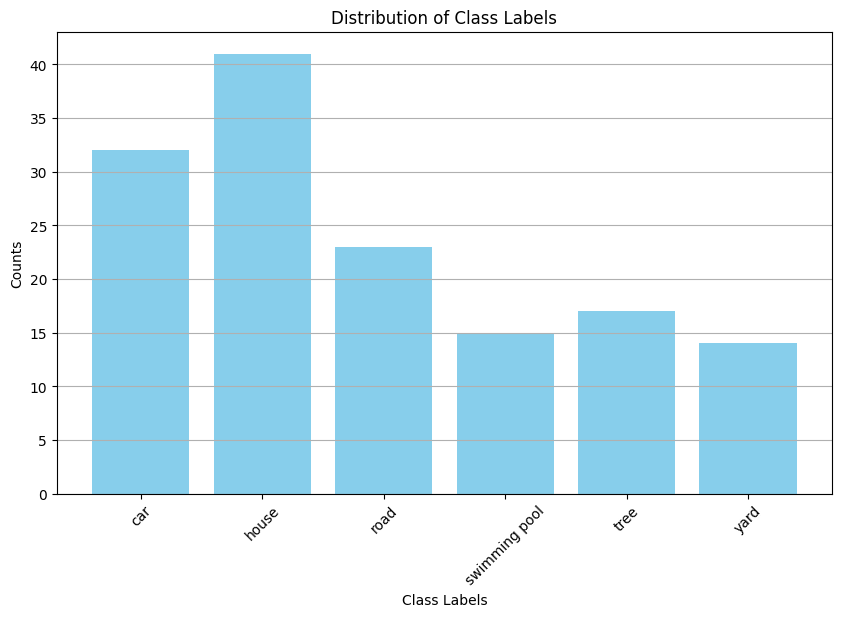

In [23]:
# Extracting data
labels = ['car', 'house', 'road', 'swimming pool', 'tree', 'yard']
counts = list(class_counts.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Class Labels')
plt.ylabel('Counts')
plt.title('Distribution of Class Labels')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show plot
plt.show()

In [25]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [33]:
def load_image(image_path):
    return Image.open(image_path)


def parse_annotation(annotation):
    parts = annotation.strip().split()
    label = parts[0]
    coordinates = [float(x) for x in parts[1:]]
    return label, coordinates


def unnormalize_coordinates(coordinates, image_width, image_height):
    unnormalized_coordinates = []
    for i in range(0, len(coordinates), 2):
        x = coordinates[i] * image_width
        y = coordinates[i + 1] * image_height
        unnormalized_coordinates.extend([x, y])
    return unnormalized_coordinates


def plot_annotations(image, annotations):
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    image_width, image_height = image.size

    for annotation in annotations:
        label, coordinates = parse_annotation(annotation)
        coordinates = unnormalize_coordinates(coordinates, image_width,
                                              image_height)
        polygon = [(coordinates[i], coordinates[i + 1])
                   for i in range(0, len(coordinates), 2)]
        polygon.append(polygon[0])  # Close the polygon

        poly = patches.Polygon(polygon,
                               closed=True,
                               fill=False,
                               edgecolor='red',
                               linewidth=2)
        ax.add_patch(poly)
        ax.text(polygon[0][0],
                polygon[0][1],
                label,
                color='yellow',
                fontsize=12,
                weight='bold')

    plt.show()

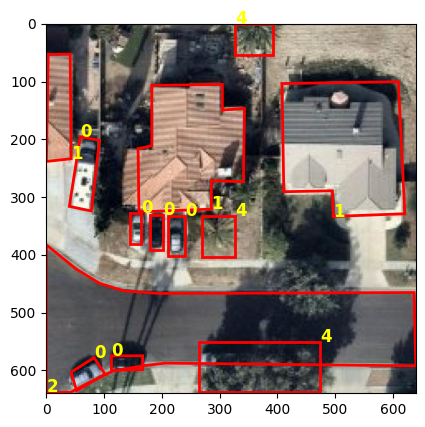

In [34]:
image_path = 'C:/Users/am330/OneDrive/Desktop/Angelswing_Assessment/Datasets/Datasets/train/images/000000000_jpg.rf.b836ed76b1e50f6262841fa1b9e27f81.jpg'
label_path = 'C:/Users/am330/OneDrive/Desktop/Angelswing_Assessment/Datasets/Datasets/train/labels/000000000_jpg.rf.b836ed76b1e50f6262841fa1b9e27f81.txt'

# Load image
image = load_image(image_path)

# Load annotations
with open(label_path, 'r') as file:
    annotations = file.readlines()

# Plot image with annotations
plot_annotations(image, annotations)

In [35]:
image.size

(640, 640)

In [40]:
test_image = load_image(
    image_path=
    'C:/Users/am330/OneDrive/Desktop/Angelswing_Assessment/Datasets/Test/IX-11-98611_0215_0650.JPG'
)
test_image.size

(6000, 4000)

In [ ]:
from ultralytics import YOLO

In [11]:
model = YOLO("yolov8m-seg.pt")

100%|██████████| 52.4M/52.4M [00:29<00:00, 1.86MB/s]


In [12]:
results = model.train(
    data=
    "C:/Users/am330/OneDrive/Desktop/Angelswing_Assessment/Datasets/Datasets/data.yaml",
    epochs=10,
    imgsz=640)

Ultralytics YOLOv8.2.50  Python-3.11.9 torch-2.3.1+cpu CPU (AMD Ryzen 7 4800H with Radeon Graphics)
engine\trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=C:/Users/am330/OneDrive/Desktop/Angelswing_Assessment/Datasets/Datasets/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False,

train: Scanning C:\Users\am330\OneDrive\Desktop\Angelswing_Assessment\Datasets\Datasets\train\labels.cache... 142 images, 0 backgrounds, 0 corrupt: 100%|██████████| 142/142 [00:00<?, ?it/s]
val: Scanning C:\Users\am330\OneDrive\Desktop\Angelswing_Assessment\Datasets\Datasets\valid\labels.cache... 41 images, 0 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<?, ?it/s]

Plotting labels to runs\segment\train4\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\segment\train4
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.889      3.622      4.224      1.893         51        640: 100%|██████████| 9/9 [22:23<00:00, 149.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING  NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [01:26<00:00, 43.45s/it]

                   all         41        144      0.426      0.121     0.0861     0.0505      0.425      0.113     0.0849     0.0343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.457      2.033      2.727      1.496         69        640: 100%|██████████| 9/9 [14:09<00:00, 94.38s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [01:25<00:00, 42.78s/it]

                   all         41        144      0.289       0.44      0.241      0.103       0.25      0.395      0.207     0.0877



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.404      1.753      2.401      1.444         48        640: 100%|██████████| 9/9 [13:17<00:00, 88.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [01:19<00:00, 39.70s/it]

                   all         41        144      0.198      0.586       0.26      0.121      0.219      0.505      0.271       0.13



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.375      1.581      2.126      1.385         56        640: 100%|██████████| 9/9 [13:44<00:00, 91.58s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [01:17<00:00, 38.67s/it]

                   all         41        144      0.261      0.554      0.296      0.153      0.271      0.555       0.31      0.144



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.302      1.494      1.961      1.364         51        640:  67%|██████▋   | 6/9 [12:20<06:12, 124.32s/it]